In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# Intra-class, inter-class, and total variance

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Draw $m_0$ samples from a Gaussian probability density function with mean vector $\pmb{\mu}_0$ and covariance matrix $\pmb{\Sigma}_0$:

In [3]:
m0 = 1000
mean0 = [-1,  3]
cov0 = numpy.array([[1, 0], [0, 1]])
samples0 = numpy.random.multivariate_normal(mean0, cov0, m0).T

Draw $m_1$ samples from another Gaussian pdf with mean vector $\pmb{\mu}_1$ and covariance matrix $\pmb{\Sigma}_1$:

In [4]:
m1 = 2000
mean1 = [3,  0]
cov1 = numpy.array([[1, 0.6], [0.6, 1.5]])
samples1 = numpy.random.multivariate_normal(mean1, cov1, m1).T

Visualize the samples and the corresponding covariance matrices from both classes $\Omega_0$ and $\Omega_1$:

In [5]:
def cov_ellipse(mean, covmat):
    a1 = sqrt(covmat[0, 0]);
    a3 = covmat[0, 1] / a1;
    a2 = sqrt(covmat[1, 1] - a3*a3);
    t = linspace(0, 2*pi, 101)
    x1 = a1 * cos(t) + mean[0]
    x2 = a3 * cos(t) + a2 * sin(t) + mean[1]
    return np.r_['0,2', x1, x2]

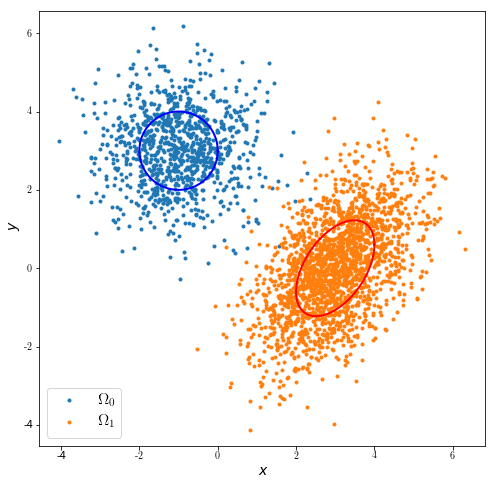

In [6]:
figure(figsize=(8,8))
plt.plot(samples0[0], samples0[1], '.')
plt.plot(samples1[0], samples1[1], '.')
plt.axis([-4, 6, -4, 6])
plt.axis('equal')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend(['$\Omega_0$', '$\Omega_1$'], loc='lower left', fontsize=16)
# draw the covariance ellipse
ellipse0 = cov_ellipse(mean0, cov0)
ellipse1 = cov_ellipse(mean1, cov1)
plt.plot(ellipse0[0], ellipse0[1], c = 'blue', linewidth = 2)
plt.plot(ellipse1[0], ellipse1[1], c = 'red', linewidth = 2);

## Estimation of the pdf parameters

Estimated mean vector $\pmb{\hat{\mu}}_0$ and covariance matrix $\pmb{\hat{\Sigma}}_0$ of class $\Omega_0$:

In [7]:
mean0_est = numpy.mean(samples0, 1)
print(mean0_est)

[-1.00937456  3.04149071]


In [8]:
cov0_est = numpy.cov(samples0)
print(cov0_est)

[[ 0.97998575 -0.01342815]
 [-0.01342815  0.98380604]]


The larger the number of samples is, the closer the estimated parameters are to the true parameters.

Estimated mean vector $\pmb{\hat{\mu}}_1$ and covariance matrix $\pmb{\hat{\Sigma}}_1$ of class $\Omega_1$:

In [9]:
mean1_est = numpy.mean(samples1, 1)
print(mean1_est)

[ 2.98552323  0.00443411]


In [10]:
cov1_est = numpy.cov(samples1)
print(cov1_est)

[[ 1.00957059  0.63504499]
 [ 0.63504499  1.51737631]]


## Intra-class variance

Estimated prior probabilities $\hat{p}_0$ and $\hat{p}_1$:

In [11]:
p0 = len(samples0[0]) / (len(samples0[0]) + len(samples1[0]))
p1 = 1 - p0
print(p0, p1)

0.3333333333333333 0.6666666666666667


Intra-class covariance matrix:
$$
  \pmb{\hat{\Sigma}}_\text{intra} = \hat{p}_0 \cdot \pmb{\hat{\Sigma}}_0 + \hat{p}_1 \cdot \pmb{\hat{\Sigma}}_1
$$

In [12]:
cov_intra = p0 * cov0_est + p1 * cov1_est
print(cov_intra)

[[ 0.99970898  0.41888727]
 [ 0.41888727  1.33951955]]


## Total variance

In [13]:
samples = numpy.append(samples0, samples1, 1)

In [14]:
mean_total = numpy.mean(samples, 1)
print(mean_total)

[ 1.65389063  1.01678631]


In [15]:
cov_total = numpy.cov(samples)
print(cov_total)

[[ 4.54705223 -2.27824173]
 [-2.27824173  3.38952963]]


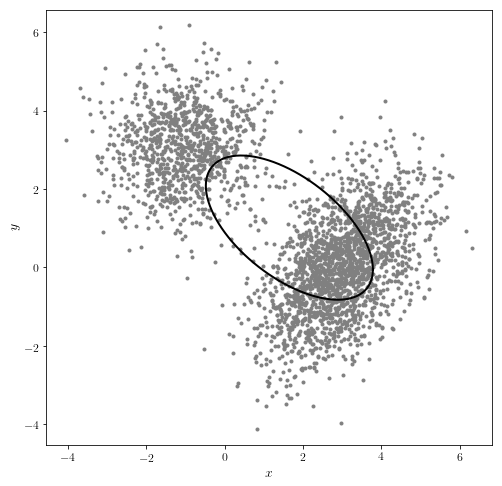

In [16]:
figure(figsize=(8,8))
plt.plot(samples[0], samples[1], '.', color='gray')
plt.axis([-4, 6, -4, 6])
plt.axis('equal')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
ellipse = cov_ellipse(mean_total, cov_total)
plt.plot(ellipse[0], ellipse[1], c = 'black', linewidth = 2);

## Inter-class variance

In [17]:
diff0 = numpy.matrix(mean0_est - mean_total)
diff1 = numpy.matrix(mean1_est - mean_total)
cov_inter = p0 * diff0.T * diff0 + p1 * diff1.T * diff1

In [18]:
cov_inter

matrix([[ 3.54649076, -2.69616238],
        [-2.69616238,  2.04971396]])

## Sanity check

$$
\pmb{\hat{\Sigma}}_\text{total} = \pmb{\hat{\Sigma}}_\text{intra} + \pmb{\hat{\Sigma}}_\text{inter}
$$

In [19]:
print(cov_total - (cov_intra + cov_inter))

[[ 0.0008525  -0.00096662]
 [-0.00096662  0.00029612]]
